# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy

### Read the csv data into a pandas dataframe and display the first 5 samples

In [2]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [4]:
df.shape

(414, 8)

### What are the features available in the dataset?

In [5]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [6]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [7]:
X = df.iloc[:,:-1]
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [8]:
y = df.iloc[:,-1:]
y

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


### Split the dataset into train and test data

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

### Choose the model

In [10]:
from sklearn.linear_model import LinearRegression, ElasticNet

### Create an Estimator object

In [11]:
linearRegressionModel = GridSearchCV(LinearRegression(),param_grid={
    'copy_X': [True,False],
    'fit_intercept': [True,False],
    'positive': [True,False]})

elasticNetModel = RandomizedSearchCV(ElasticNet(),param_distributions={
    'alpha':range(0,500,1),
    # 'l1_ratio':np.arange(0.0,1.0),
    # 'fit_intercept':[True,False],
    'max_iter': range(50,5000),
    'tol': np.arange(1e-5,1e-4,1e-7),
    'warm_start':[True,False],
    'selection':['cyclic','random']}
)

### Train the model

In [12]:
linearRegressionModel.fit(X_train,y_train)
elasticNetModel.fit(X_train, y_train)
print(f'linearRegressionModel best_params:{linearRegressionModel.best_params_}\nelasticNetModel best_params:{elasticNetModel.best_params_}')
# sgdRegressionModel.fit(X_train,np.reshape(y_train.values,y_train.shape[0]))

linearRegressionModel best_params:{'copy_X': True, 'fit_intercept': True, 'positive': False}
elasticNetModel best_params:{'warm_start': True, 'tol': 6.550000000000041e-05, 'selection': 'cyclic', 'max_iter': 3779, 'alpha': 40}


### Apply the model

In [13]:
_=linearRegressionModel.predict(X_test)
_=elasticNetModel.predict(X_test)


### Display the coefficients

In [14]:
print('linearRegressionModel.best_estimator_.coef_:\n',linearRegressionModel.best_estimator_.coef_,'\n')
print('elasticNetModel.best_estimator_.coef_:\n',elasticNetModel.best_estimator_.coef_)
# sgdRegressionModel.coef_


linearRegressionModel.best_estimator_.coef_:
 [[-2.45311412e-03  5.05993536e+00 -2.80512140e-01 -4.80059367e-03
   1.12171114e+00  1.98604558e+02 -9.27159949e+00]] 

elasticNetModel.best_estimator_.coef_:
 [-0.00239437  0.         -0.06768036 -0.00742461  0.          0.
 -0.        ]


### Find how well the trained model did with testing data

In [15]:
print(f'linearRegressionModel.best_score_: {linearRegressionModel.best_score_}\nelasticNetModel.best_score_: {elasticNetModel.best_score_}')

linearRegressionModel.best_score_: 0.5579588130995103
elasticNetModel.best_score_: 0.45525299542916803


### Plot House Age Vs Price
#### Hint: Use regplot in sns

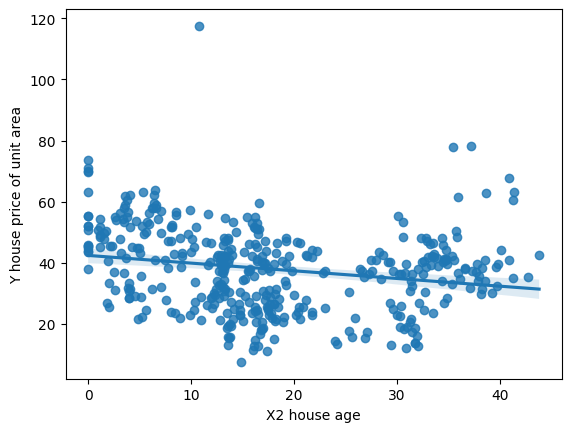

In [16]:
_=sns.regplot(x = 'X2 house age', y = 'Y house price of unit area',data = df)

### Plot Distance to MRT station Vs Price

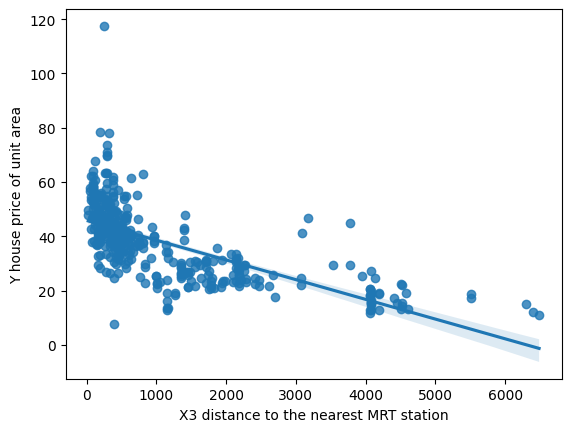

In [17]:
_=sns.regplot(x = 'X3 distance to the nearest MRT station', y = 'Y house price of unit area',data = df)

### Plot Number of Convienience Stores Vs Price

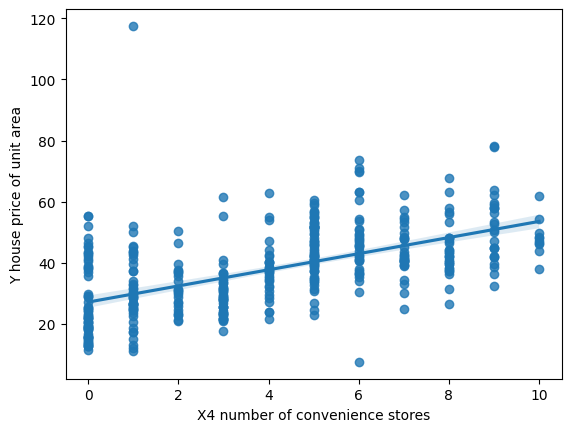

In [18]:
_=sns.regplot(x = 'X4 number of convenience stores', y = 'Y house price of unit area',data = df)